In [351]:
# import package
from dateutil import rrule
import urllib.request
import matplotlib.pyplot as plt
import datetime
import json
import pandas as pd
import numpy as np
import copy

## 1.將各國歷年貨幣以折線圖形式印出

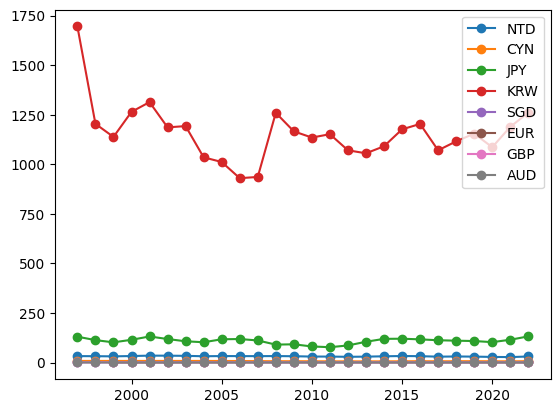

In [352]:
# trans json data to dict format
with open('data.json', encoding='utf-8') as f:
    data_dict = json.load(f)

# let DollarList each element a list, and let the first element of each list the name of currency
x = []
DollarList =[["NTD"],["CYN"],["JPY"],["KRW"],["SGD"],["EUR"],["GBP"],["AUD"]]

# store each value of currency in order of years
for i in data_dict:
    k = 0
    for j in i.values():
        if k == 0:
            x.append(int(j))
        elif j != '-':
            DollarList[k-1].append(float(j))
        else:
            DollarList[k-1].append(np.nan)
        k += 1

# draw each line and the legend
for i in DollarList:
    y = i[1:]
    plt.plot(x, y, '-o', label=i[0])
plt.legend(loc = 'upper right')
plt.show()
#print(DollarList)


## 2.將各國歷年貨幣變化率以折線圖形式印出

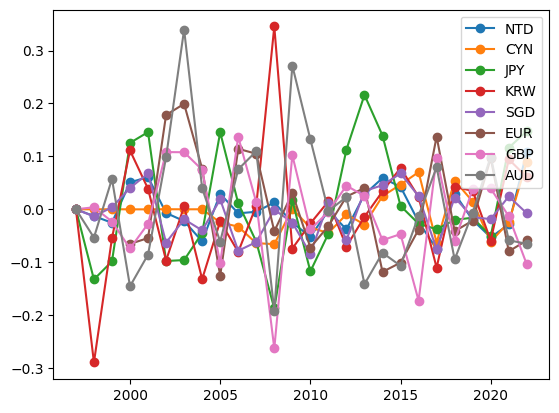

In [353]:
# func for calculate change rate
def changeRate(a ,b):
    if isinstance(a, (int, float)) and isinstance(b, (int, float)):
        return (b-a)/a
    else :
        return 0

# use deepcopy to buildup changeRateList
changeRateList = copy.deepcopy(DollarList)

# put the result to the changeRateList by function and loop
z = 0
# each currency
for i in DollarList:
    j = 2
    # each year
    while j < len(i):
        changeRateList[z][j] = changeRate(i[j-1],i[j])
        j += 1
    z += 1

# draw each line and the legend
for i in changeRateList:
    i[1] = 0
    y = i[1:]
    plt.plot(x, y, '-o', label=i[0])
plt.legend(loc = 'upper right')
plt.show()

    

## 3.有一位生在1997年，有超能力的Sam先生，能夠預知未來25年八種貨幣(除美金之外)的漲幅，然而超能力伴隨著限制，他只能用現有的10000美金買賣其餘8種貨幣，無法進行任何貸款、槓桿、做空等，試問保守他最後能有多少錢?

In [354]:
Sam = 10000

i = 0
while i < len(changeRateList):
    j = 1
    maxRate = 0
    while j < len(changeRateList[i]):
        # store the max rate
        if(changeRateList[i][j] > maxRate):
            maxRate = changeRateList[i][j]
        j += 1
    # multiply the rate
    Sam *=(1+maxRate)
    i += 1
print("Sam finally has %.2f dollars." % Sam)


Sam finally has 38579.73 dollars
